# Case Study - Credit Card Dataset

## Setup
Dataset Loading and Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns


# Load the dataset from a local file
data = pd.read_csv('Credit_Card_Dataset.csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PUR_FREQ                   8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# DATA Manipulation
data.drop(["CUST_ID"], axis = 1, inplace = True) #"axis = 1" indicates to delete the whole column |"inpalce = True" means replace master data, does not create a copy
data.info()
data.dropna(inplace = True, axis=0) #drop all the rows with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PUR_FREQ                   8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [12]:
data.shape

(8636, 17)

In [6]:
# Standardize the features
# scaler = Normalizer()
# X = scaler.fit_transform(data)
pca = PCA(n_components=5)
X = pca.fit_transform(data)

In [14]:
X=data

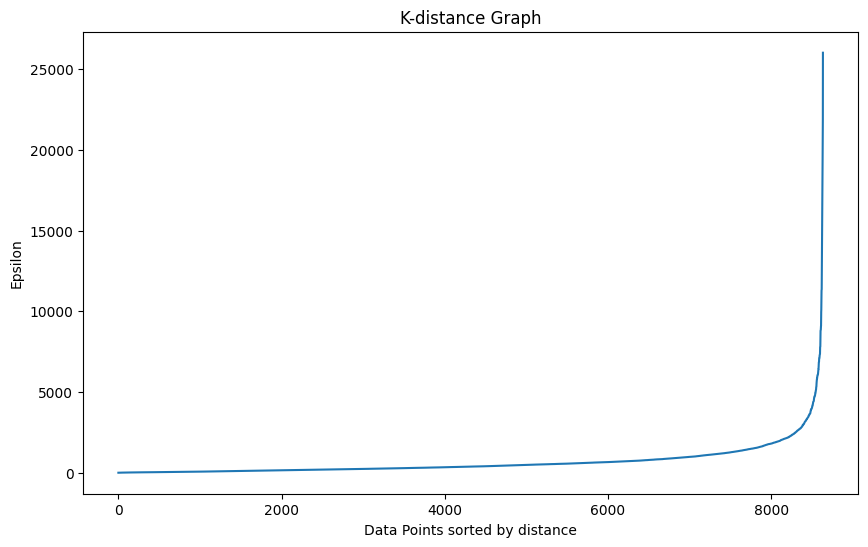

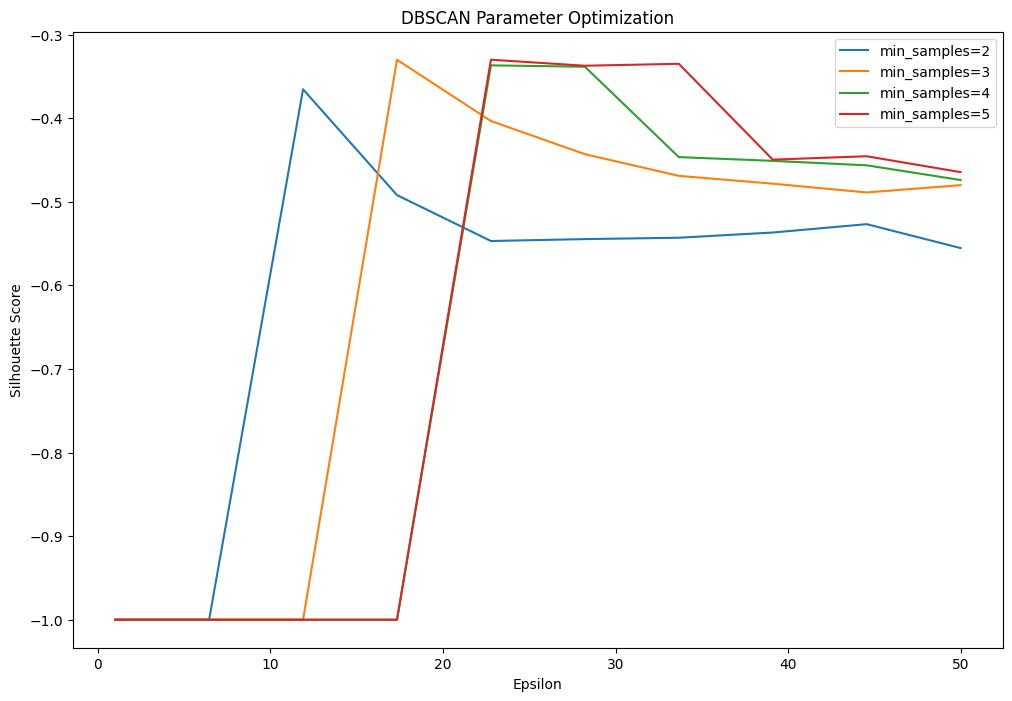

Best parameters:
eps: 22.78
min_samples: 5
silhouette score: -0.330


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def find_optimal_dbscan_params(X):
    # 1. Find optimal eps using KNN distance plot
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(X)
    distances, _ = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, 1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.show()
    
    # 2. Test different combinations
    eps_range = np.linspace(1, 50, 10)
    min_samples_range = range(2, 6)
    scores = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Skip if all points are noise (-1)
            if len(np.unique(labels)) < 2:
                scores.append((eps, min_samples, -1))
                continue
                
            try:
                score = silhouette_score(X, labels)
                scores.append((eps, min_samples, score))
            except:
                scores.append((eps, min_samples, -1))
    
    # Convert to numpy array for easier handling
    scores = np.array(scores)
    
    # 3. Visualize results
    plt.figure(figsize=(12, 8))
    for min_samples in min_samples_range:
        mask = scores[:, 1] == min_samples
        plt.plot(scores[mask, 0], scores[mask, 2], 
                label=f'min_samples={min_samples}')
    
    plt.xlabel('Epsilon')
    plt.ylabel('Silhouette Score')
    plt.title('DBSCAN Parameter Optimization')
    plt.legend()
    plt.show()
    
    # 4. Find best parameters
    best_idx = np.argmax(scores[:, 2])
    best_eps, best_min_samples, best_score = scores[best_idx]
    
    print(f"Best parameters:")
    print(f"eps: {best_eps:.2f}")
    print(f"min_samples: {int(best_min_samples)}")
    print(f"silhouette score: {best_score:.3f}")
    
    return best_eps, best_min_samples

# Find optimal parameters
optimal_eps, optimal_min_samples = find_optimal_dbscan_params(X)

Apply DBSCAN with optimal parameters
optimal_dbscan = DBSCAN(eps=optimal_eps, min_samples=int(optimal_min_samples))
labels = optimal_dbscan.fit_predict(X)
silhouette_score_kmeans = silhouette_score(X, labels)
print(f"Silhouette Score (K-means): {silhouette_score_kmeans:.4f}")

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-means clustering results
# plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=kmeans_labels, cmap='viridis', s=50)
# plt.title('K-means Clustering')
# plt.xlabel('Bill Length (mm)')
# plt.ylabel('Bill Depth (mm)')
# plt.show()

# Calculate the Silhouette Score for K-means clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (K-means): {silhouette_score_kmeans:.4f}")


Silhouette Score (K-means): 0.4160


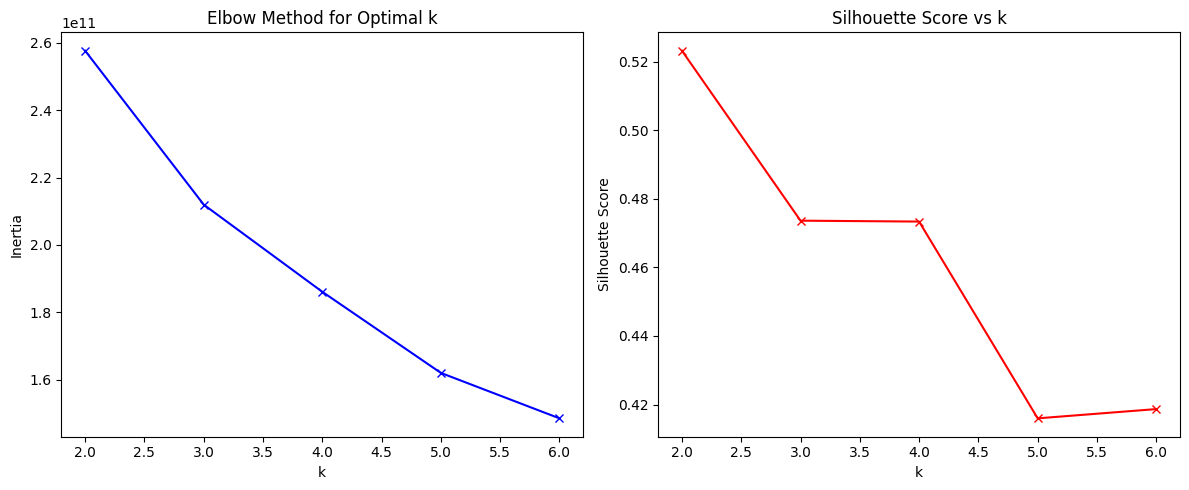


Inertia values:
k=2: 257633324023.97
k=3: 211979745464.60
k=4: 186114995121.60
k=5: 162051572109.50
k=6: 148577147890.51

Silhouette scores:
k=2: 0.5232
k=3: 0.4736
k=4: 0.4734
k=5: 0.4160
k=6: 0.4187

Optimal number of clusters based on Silhouette score: 2


In [113]:
# Calculate inertia for different k values
inertias = []
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot elbow curve
plt.figure(figsize=(12, 5))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.tight_layout()
plt.show()

# Print the results
print("\nInertia values:")
for k, inertia in zip(k_range, inertias):
    print(f"k={k}: {inertia:.2f}")

print("\nSilhouette scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette score: {optimal_k}")

In [115]:
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print(f"Silhouette Score (Hierarchical): {hierarchical_silhouette:.4f}")

Silhouette Score (Hierarchical): 0.3748


In [134]:
dbscan = DBSCAN(eps=19, min_samples=1000)  # eps and min_samples may need tuning
dbscan_labels = dbscan.fit_predict(X)
# dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
# print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette}")

In [135]:
dbscan_labels[dbscan_labels != -1] 

array([], dtype=int64)